## Лаб.05 DBSCAN

### Кластеризация DBSCAN

---

#### Входные данные: 
датасет в формате `us_census.csv`, содержащий данные о городах США (индекс, штат, географические широта и долгота, численность населения). 

#### Задание:
Написать программный код разбиения городов самого большого штата на кластеры таким образом, чтобы определить местонахождение центров, оптимальное по удаленности городов. 

**Порядок выполнения работы:**
1. Загрузите данные в датафрейм. Определите штат с максимальным количеством городов. Выделите из датафрейма столбцы с географическими координатами для городов выбранного штата.
2. Постройте модели кластеризации методом DBSCAN, задав для каждой параметр _eps_ из интервала [0.3, 1]. Параметр _min_samples_ оставить по умолчанию. Выведите итоговое число кластеров и число шумовых точек.
3. Вычислите метрики: силуэт и сумму квадратов расстояний от центроидов (_inertia_).
4. Постройте диаграммы с исходными точками и центроидами полученных кластеров. Оцените визуально нахождение центров относительно распределения городов.
5. Сравните наилучший результат кластеризации DBSCAN с лучшим результатом кластеризации K-means по полученным показателям.

---

1. Загрузите данные в датафрейм. Определите штат с максимальным количеством городов. Выделите из датафрейма столбцы с географическими координатами для городов выбранного штата.

In [ ]:
# подключим библиотеки

import pandas as pd
from sklearn.metrics import pairwise_distances_argmin_min

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
# добавим данные в датаафрейм

# use this line if on Jupyter
# df = pd.read_csv('us_census.csv')

# use this line if on Colab
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/us_census.csv')

In [ ]:
# выведем первые 5 строк таблицы

df.head(5)

,zip,state,latitude,longitude,population
0,601,PR,18.180103,-66.74947,19143
1,602,PR,18.363285,-67.18024,42042
2,603,PR,18.448619,-67.13422,55592
3,604,PR,18.498987,-67.13699,3844
4,606,PR,18.182151,-66.95880,6449


In [ ]:
# определим штат с максимальным числом городов
# determine the state with the maximum number of cities

df.groupby('state').zip.nunique().sort_values(ascending=False)

state
TX    1861
PA    1721
CA    1667
NY    1594
IL    1345
OH    1159
MO    1009
MI     962
IA     948
FL     920
VA     884
MN     864
NC     783
WI     767
KY     766
IN     760
WV     733
GA     707
KS     689
OK     655
AL     623
TN     607
AR     594
NJ     582
NE     578
WA     559
LA     514
MA     500
CO     479
MD     452
MS     423
OR     406
SC     406
ME     399
ND     380
SD     378
AZ     364
MT     349
NM     344
ID     275
UT     273
CT     266
VT     254
AK     241
NH     227
WY     166
NV     146
PR     125
HI      87
RI      70
DE      65
DC      25
Name: zip, dtype: int64

Штат с максимальным числом городов — ТХ.

In [ ]:
# выделите из датафрейма столбцы с географическими координатами для городов выбранного штата
# select from the dataframe columns with geographic coordinates for the cities of the selected state

df1 = df[df['state'] == 'TX'][['latitude', 'longitude']].reset_index(drop=True)

---

2. Постройте модели кластеризации методом DBSCAN, задав для каждой параметр _eps_ из интервала [0.3, 1]. Параметр _min_samples_ оставить по умолчанию. Выведите итоговое число кластеров и число шумовых точек.

In [ ]:
# build clustering models using the DBSCAN method, setting the eps parameter for each from the interval [0.3, 1]
# leave the min_samples parameter as default. output the total number of clusters and the number of noise points


from sklearn.cluster import DBSCAN

for eps in range(3, 11):
    model = DBSCAN(eps=eps / 10, min_samples=5) # min_samples:int, default=5
    model.fit(df1)
    print(f'eps={eps / 10}, clusters={len(set(model.labels_))}, noise={list(model.labels_).count(-1)}', set(model.labels_))


# noise means outliers 

eps=0.3, clusters=18, noise=105 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, -1}
eps=0.4, clusters=4, noise=34 {0, 1, 2, -1}
eps=0.5, clusters=3, noise=23 {0, 1, -1}
eps=0.6, clusters=3, noise=12 {0, 1, -1}
eps=0.7, clusters=3, noise=4 {0, 1, -1}
eps=0.8, clusters=2, noise=0 {0, 1}
eps=0.9, clusters=2, noise=0 {0, 1}
eps=1.0, clusters=1, noise=0 {0}


eps=0.3, clusters=18, noise=105 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, -1}


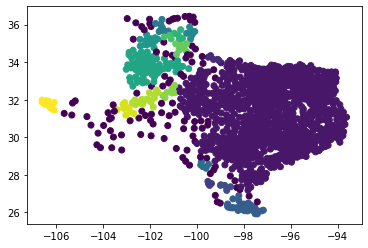

In [ ]:
model = DBSCAN(eps=3 / 10)
model.fit(df1)
plt.scatter(df1['longitude'], df1['latitude'], c=model.labels_)
print(f'eps={3 / 10}, clusters={len(set(model.labels_))}, noise={list(model.labels_).count(-1)}', set(model.labels_))

eps=0.4, clusters=4, noise=34 {0, 1, 2, -1}


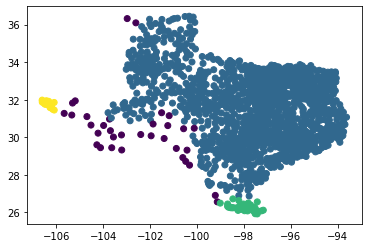

In [ ]:
model = DBSCAN(eps=4 / 10)
model.fit(df1)
plt.scatter(df1['longitude'], df1['latitude'], c=model.labels_)
print(f'eps={4 / 10}, clusters={len(set(model.labels_))}, noise={list(model.labels_).count(-1)}', set(model.labels_))

eps=0.5, clusters=3, noise=23 {0, 1, -1}


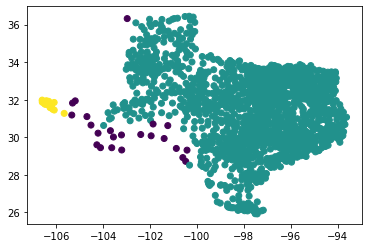

In [ ]:
model = DBSCAN(eps=5 / 10)
model.fit(df1)
plt.scatter(df1['longitude'], df1['latitude'], c=model.labels_)
print(f'eps={5 / 10}, clusters={len(set(model.labels_))}, noise={list(model.labels_).count(-1)}', set(model.labels_))

eps=0.6, clusters=3, noise=12 {0, 1, -1}


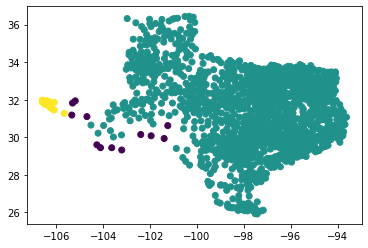

In [ ]:
model = DBSCAN(eps=6 / 10)
model.fit(df1)
plt.scatter(df1['longitude'], df1['latitude'], c=model.labels_)
print(f'eps={6 / 10}, clusters={len(set(model.labels_))}, noise={list(model.labels_).count(-1)}', set(model.labels_))

eps=0.7, clusters=3, noise=4 {0, 1, -1}


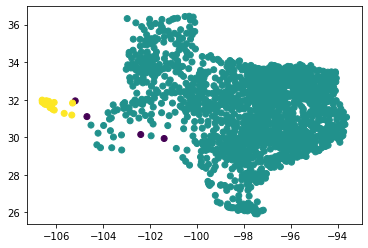

In [ ]:
model = DBSCAN(eps=7 / 10)
model.fit(df1)
plt.scatter(df1['longitude'], df1['latitude'], c=model.labels_)
print(f'eps={7 / 10}, clusters={len(set(model.labels_))}, noise={list(model.labels_).count(-1)}', set(model.labels_))

eps=0.8, clusters=2, noise=0 {0, 1}


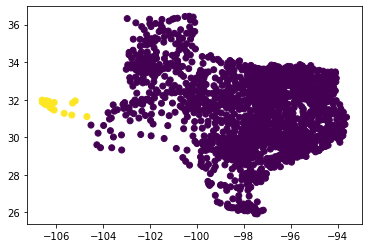

In [ ]:
model = DBSCAN(eps=8 / 10)
model.fit(df1)
plt.scatter(df1['longitude'], df1['latitude'], c=model.labels_)
print(f'eps={8 / 10}, clusters={len(set(model.labels_))}, noise={list(model.labels_).count(-1)}', set(model.labels_))

eps=0.9, clusters=2, noise=0 {0, 1}


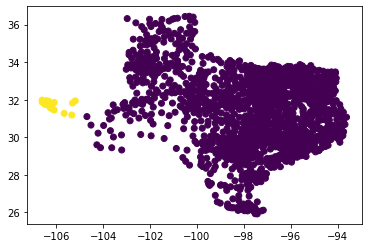

In [ ]:
model = DBSCAN(eps=9 / 10)
model.fit(df1)
plt.scatter(df1['longitude'], df1['latitude'], c=model.labels_)
print(f'eps={9 / 10}, clusters={len(set(model.labels_))}, noise={list(model.labels_).count(-1)}', set(model.labels_))

eps=1.0, clusters=1, noise=0 {0}


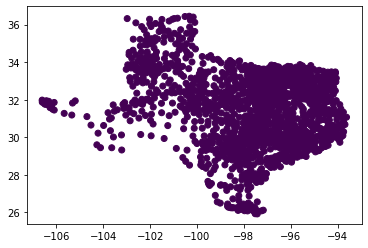

In [ ]:
model = DBSCAN(eps=10 / 10)
model.fit(df1)
plt.scatter(df1['longitude'], df1['latitude'], c=model.labels_)
print(f'eps={10/ 10}, clusters={len(set(model.labels_))}, noise={list(model.labels_).count(-1)}', set(model.labels_))

---

3. Вычислите метрики: силуэт и сумму квадратов расстояний от центроидов (_inertia_).

In [ ]:
# calculate metrics: silhouette and sum of squared distances from centroids (inertia)

from sklearn.metrics import silhouette_score

for eps in range(3, 10):
    model = DBSCAN(eps=eps / 10)
    model.fit(df1)
    print(f'eps = {eps / 10}, silhouette = {silhouette_score(df1, model.labels_):.3f}')

eps = 0.3, silhouette = 0.063
eps = 0.4, silhouette = 0.241
eps = 0.5, silhouette = 0.374
eps = 0.6, silhouette = 0.395
eps = 0.7, silhouette = 0.374
eps = 0.8, silhouette = 0.536
eps = 0.9, silhouette = 0.537


In [ ]:
# calculate the sum of squares of distances from centroids (Inertia)

for eps in range(3, 10):
    model = DBSCAN(eps=eps / 10)
    model.fit(df1)
    centroids = df1.iloc[model.core_sample_indices_]
    labels = model.labels_
    print(f'eps = {eps / 10}, inertia = {sum(pairwise_distances_argmin_min(centroids, df1, metric="euclidean")[1]):.6f}')

eps = 0.3, inertia = 0.000366
eps = 0.4, inertia = 0.000412
eps = 0.5, inertia = 0.000423
eps = 0.6, inertia = 0.000427
eps = 0.7, inertia = 0.000429
eps = 0.8, inertia = 0.000429
eps = 0.9, inertia = 0.000431


In [ ]:
for eps in range(3, 10):
    model = DBSCAN(eps=eps / 10)
    model.fit(df1)
    centroids = df1.iloc[model.core_sample_indices_]
    labels = model.labels_
    print(f'eps = {eps / 10}, clusters={len(set(model.labels_))}, inertia = {sum(pairwise_distances_argmin_min(centroids, df1, metric="euclidean")[1]):.6f}')

eps = 0.3, clusters=18, inertia = 0.000366
eps = 0.4, clusters=4, inertia = 0.000412
eps = 0.5, clusters=3, inertia = 0.000423
eps = 0.6, clusters=3, inertia = 0.000427
eps = 0.7, clusters=3, inertia = 0.000429
eps = 0.8, clusters=2, inertia = 0.000429
eps = 0.9, clusters=2, inertia = 0.000431


In [ ]:
clusters=[18,4,3,3,3,2,2]

In [ ]:
inertia

[0.0003662109375,
 0.0004119873046875,
 0.000423431396484375,
 0.00042724609375,
 0.0004291534423828125,
 0.0004291534423828125,
 0.000431060791015625]

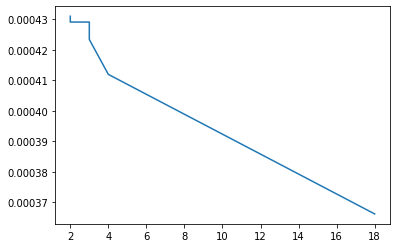

In [ ]:
plt.plot(clusters, inertia)

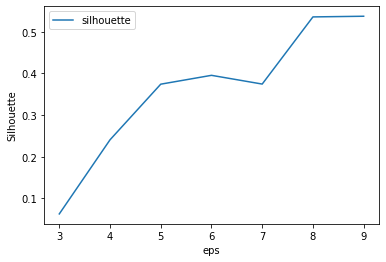

In [ ]:
# plot the silhoutte and the inertia

import matplotlib.pyplot as plt

silhouette = []
inertia = []

for eps in range(3, 10):
    model = DBSCAN(eps=eps / 10)
    model.fit(df1)
    silhouette.append(silhouette_score(df1, model.labels_))
    centroids = df1.iloc[model.core_sample_indices_]
    labels = model.labels_
    inertia.append(sum(pairwise_distances_argmin_min(centroids, df1, metric="euclidean")[1]))

plt.plot(range(3, 10), silhouette, label='silhouette')
plt.xlabel('eps')
plt.ylabel('Silhouette')
plt.legend()
plt.show()

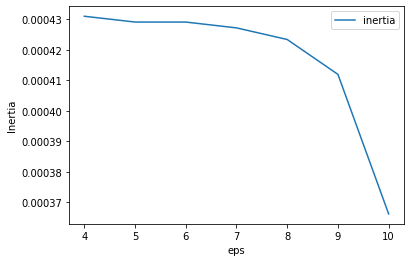

In [ ]:
plt.plot(range(10, 3, -1), inertia, label='inertia')
plt.xlabel('eps')
plt.ylabel('Inertia')
plt.legend()
plt.show()

---

4. Постройте диаграммы с исходными точками и центроидами полученных кластеров. Оцените визуально нахождение центров относительно распределения городов.

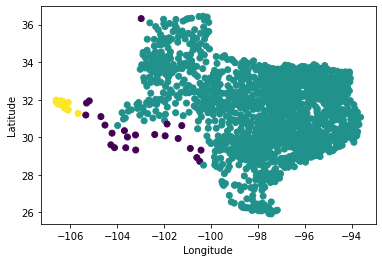

In [ ]:
# construct diagrams with initial points and centroids of the received clusters
# assess visually the location of the centers in relation to the distribution of cities

import matplotlib.pyplot as plt

model = DBSCAN(eps=0.5)
model.fit(df1)
plt.scatter(df1['longitude'], df1['latitude'], c=model.labels_)
#plt.scatter(df1['longitude'][model.labels_ == -1], df1['latitude'][model.labels_ == -1], c='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

---

5. Сравните наилучший результат кластеризации DBSCAN с лучшим результатом кластеризации K-means по полученным показателям.


Let us see a comparison between K-Means and DBSCAN.

K-Means: 
* K-means generally clusters all the objects.
* K-means needs a prototype-based concept of a cluster.
* K-means has difficulty with non-globular clusters and clusters of multiple sizes.
* K-means can be used for data that has a clear centroid, including a mean or median.
* K-means can be used to sparse, high dimensional data, including file data.
* The basic K-means algorithm is similar to a statistical clustering approach (mixture models) that consider all clusters come from spherical Gaussian distributions with several means but the equal covariance matrix.

DBSCAN
* DBSCAN discards objects that it defines as noise.
* DBSCAN needs a density-based concept.
* DBSCAN is used to handle clusters of multiple sizes and structures and is not powerfully influenced by noise or outliers.
* DBSCAN needed that its definition of density, which depends on the traditional Euclidean concept of density, be significant for the data.
* DBSCAN generally implements poorly for such information because the traditional Euclidean definition of density does not operate well for high dimensional data.
* DBSCAN creates no assumption about the distribution of the record.